<a href="https://colab.research.google.com/github/Abrazacs/statistics_lab/blob/main/%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [228]:
# считывание файла
df1 = pd.read_csv('ex1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Text(0.5, 1.0, 'Диаграмма рассеяния')

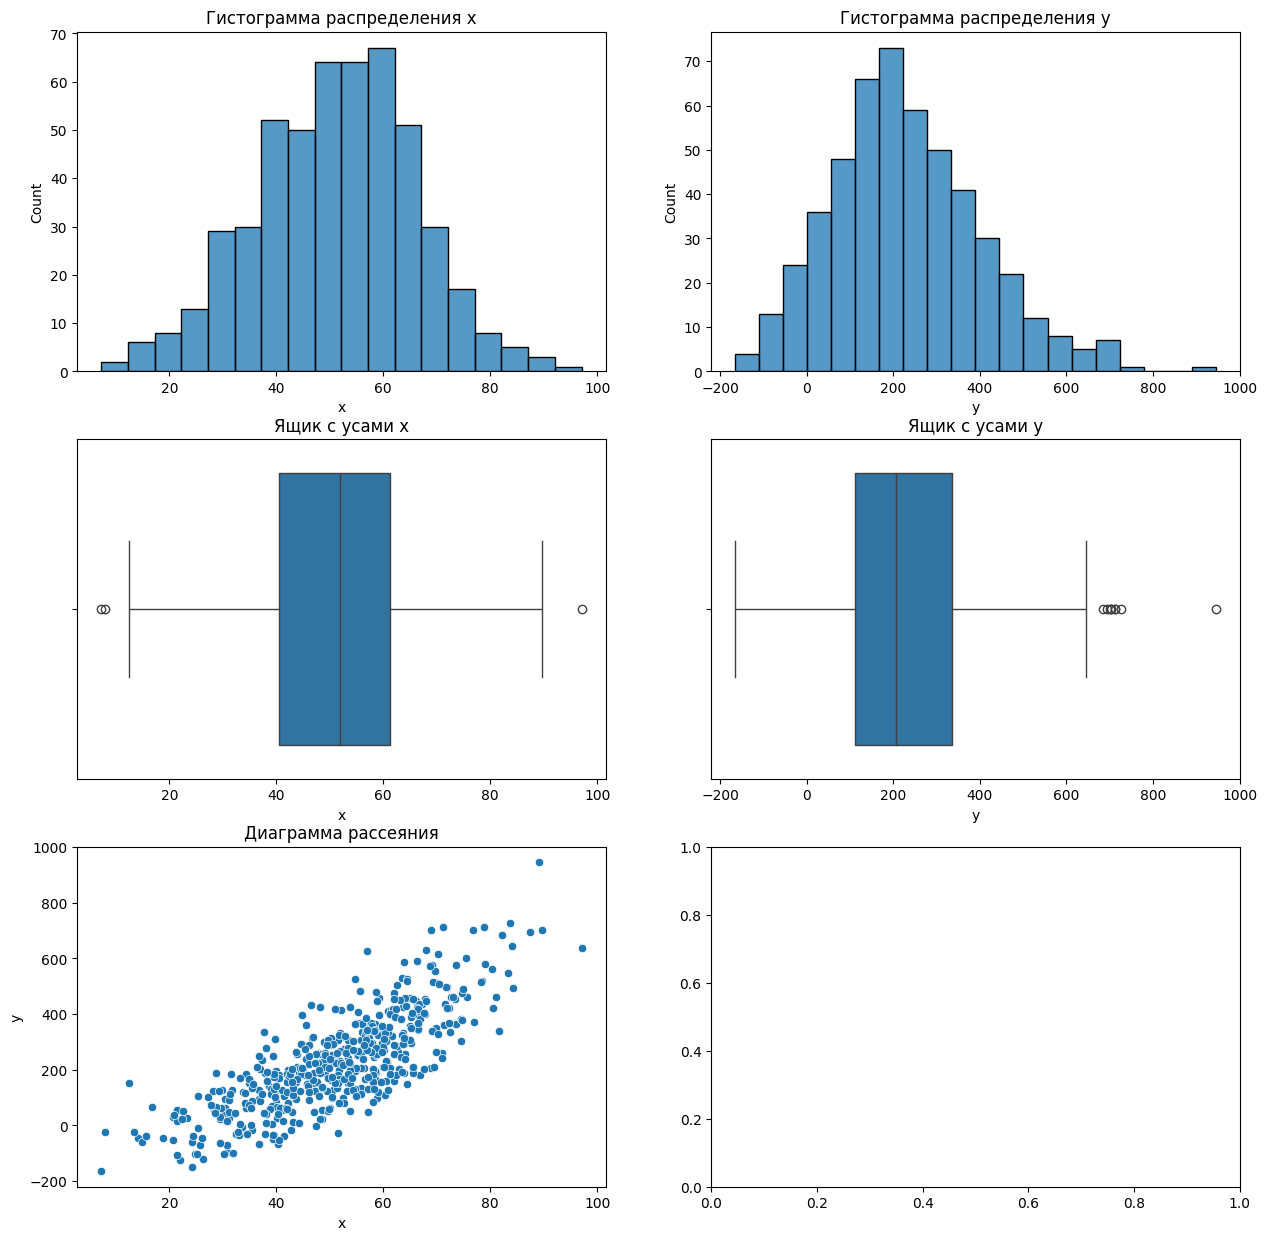

In [229]:
# КРИТЕРИЙ 1
# проверка, что все элементы - численного типа
df1.info() # x и y имеют dtype = float64

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
# построение гистограмм распределения
hist_x =sns.histplot(x = 'x', data = df1, ax = axes[0][0])
hist_x.set_title("Гистограмма распределения x")
hist_y =sns.histplot(x = 'y', data = df1, ax = axes[0][1])
hist_y.set_title("Гистограмма распределения y")
# построение "ящика с усами" для изучения выбросов
boxplt_x = sns.boxplot(x = 'x', data = df1, ax = axes[1][0])
boxplt_x.set_title("Ящик с усами x")
boxplt_y = sns.boxplot(x = 'y', data = df1, ax = axes[1][1])
boxplt_y.set_title("Ящик с усами y")
# построение диаграммы рассеяния
scatter = sns.scatterplot(x = 'x', y = 'y', data = df1, ax = axes[2][0])
scatter.set_title("Диаграмма рассеяния")
# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков

На диаграме рассеяния можно увидеть линейную зависимость между x и у. Так с ростом значения по y в происходит рост значения по x. По ящикам с усами видно, что для x и y характерно, что основная часть значений распределеная по середение диапазона наблюдения, но для x характерно, что и мода и медиана практически равны, тогда как у 'у' значения между модой и медианой отличаются значительнее.
Также видны выбросы:
для x значения <10 и >90
для y значения значения > 630

Скоррее всего уровеня корреляции будет между средним и высоким. С учетом того, что есть линейная зависимость, и значения распределены нормально, имеет смысл расчитать коэффициент корреляции по Пирсону.

In [230]:
# КРИТЕРИЙ 2
n = len(df1)
alpha = 0.05
# расчет коэффициента Пирсона
r, p_value = sc.stats.pearsonr(df1['x'], df1['y'])
print('Коэффициент Пирсона = ', r)
# расчет t-критерия
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t_score = ',t_score)
t_critical = sc.stats.t.ppf(1 - alpha/2, df = n-2)
# вывод о степени корреляции величин и статистической значимости их взаимосвязи
print('\nПринятие решения на основе t-критерия: ')
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")
print('\nПринятие решения на основе p-value: ')
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

Коэффициент Пирсона =  0.8032321850936794
t_score =  30.092129139493785

Принятие решения на основе t-критерия: 
Связь статистически значима

Принятие решения на основе p-value: 
Связь статистически значима


Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [231]:
# считывание файла
df2 = pd.read_csv('ex2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Text(0.5, 1.0, 'Диаграмма рассеяния')

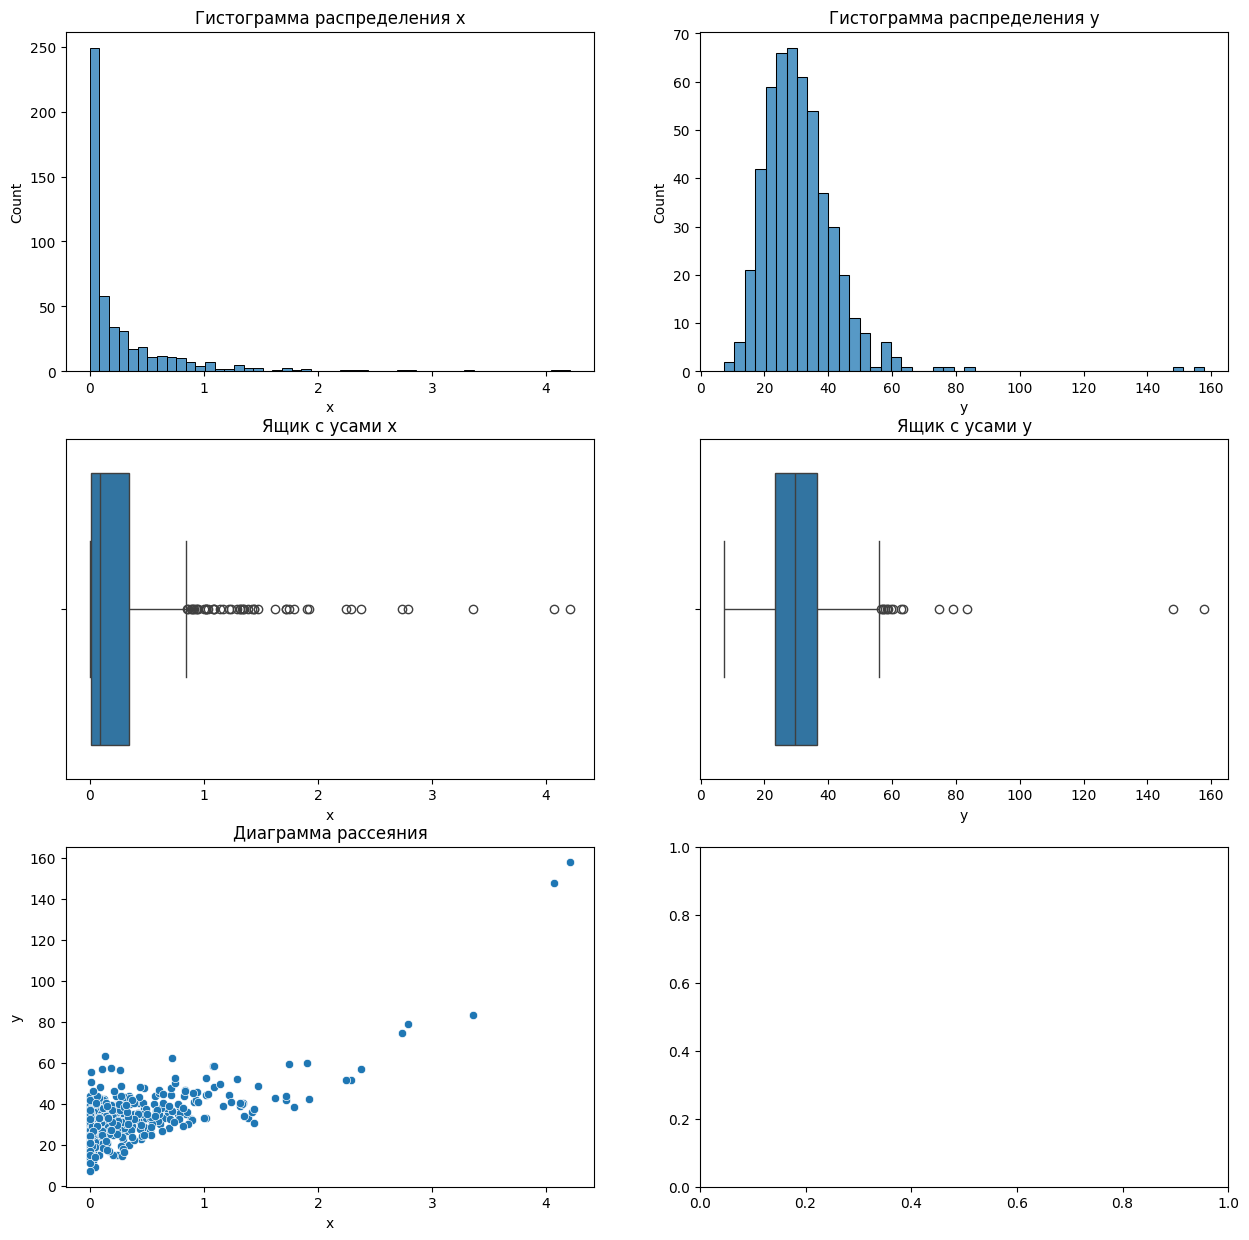

In [232]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
df2.info() # x и y имеют dtype = float64

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
# построение гистограмм распределения
hist_x =sns.histplot(x = 'x', data = df2, ax = axes[0][0])
hist_x.set_title("Гистограмма распределения x")
hist_y =sns.histplot(x = 'y', data = df2, ax = axes[0][1])
hist_y.set_title("Гистограмма распределения y")
# построение "ящика с усами" для изучения выбросов
boxplt_x = sns.boxplot(x = 'x', data = df2, ax = axes[1][0])
boxplt_x.set_title("Ящик с усами x")
boxplt_y = sns.boxplot(x = 'y', data = df2, ax = axes[1][1])
boxplt_y.set_title("Ящик с усами y")
# построение диаграммы рассеяния
scatter = sns.scatterplot(x = 'x', y = 'y', data = df2, ax = axes[2][0])
scatter.set_title("Диаграмма рассеяния")
# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


С учетом того, что значения по х не распределены нормально, имеют большое кол-во выбросов, а так же с учетом того, что мы не видем линейной зависимости на диаграмме рассеяния (скорее экспоненциальная), необходимо использовать коэффициент корреляции Спирмена

In [233]:
# КРИТЕРИЙ 4
alpha = 0.05
n = len(df2['x'])
print('n = ',n)
# расчет коэффициента Спирмена
r, p_value = sc.stats.spearmanr(df2['x'], df2['y'])
# расчет t-критерия
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
t_critical = sc.stats.t.ppf(1 - alpha/2, df = n-2)
print('Коэффициент Спирмена = ', r)
print('t_score = ',t_score)
print('t_critical = ',t_critical)
print('табличное значение = ', 1.9647390, ' источник: http://old.exponenta.ru/educat/referat/xikonkurs/student5/tabt-st.pdf')
# вывод о степени корреляции величин и статистической значимости их взаимосвязи
print('\nПринятие решения на основе t-критерия: ')
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")
print('\nПринятие решения на основе p-value: ')
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

n =  500
Коэффициент Спирмена =  0.6170866283465134
t_score =  17.500235697828852
t_critical =  1.9647389829672648
табличное значение =  1.964739  источник: http://old.exponenta.ru/educat/referat/xikonkurs/student5/tabt-st.pdf

Принятие решения на основе t-критерия: 
Связь статистически значима

Принятие решения на основе p-value: 
Связь статистически значима


Т.к. Коэффициент Спирмена ~ 0.62, то можно говорить о наличии среденей связи между x и y

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [234]:
# считывание файла
df3 = pd.read_csv('ex3.csv')

Коэффициент Присона =  -0.9851417834585036


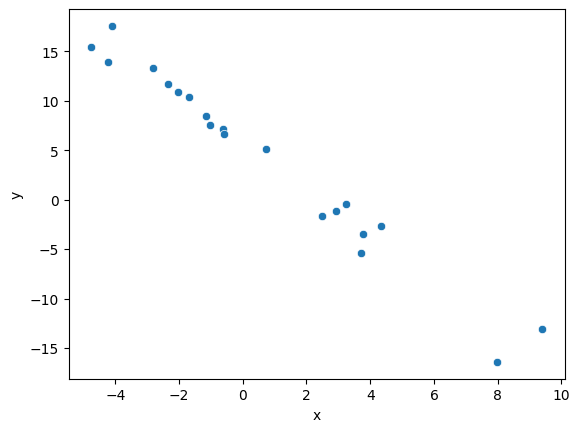

In [235]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
sns.scatterplot(x = 'x', y = 'y', data = df3)
# вывод о целесообразности использования корреляции Пирсона

# расчет коэффициента Пирсона
r, p_value = sc.stats.pearsonr(df3['x'], df3['y'])
print('Коэффициент Присона = ', r)

На диаграмме рассеяния видная линейная зависимость меджду X и Y, в связи с чем можно рассчитать коэффициент Пирсона

Коэффициент наклона -2.3391357411141347, сдвиг 5.740762449346206
Коэффициент корреляции -0.9851417834585033, коэффициент детерминации 0.9705043335158007, p-value (из теста Вальда в предположении, что наклон равен нулю) 3.1764533567699388e-15
Ошибка наклона 0.09611685229891045, ошибка сдвига 0.3755103704947338
 Y = 5.741 + -2.339*X


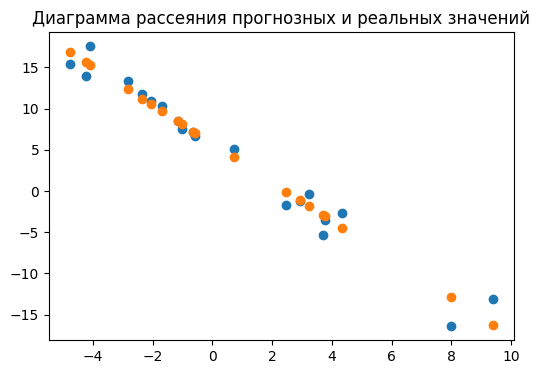

In [236]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии
res = sc.stats.linregress(df3['x'], df3['y'])
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}, p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')
print(f' Y = {round(res.intercept, 3)} + {round(res.slope, 3)}*X')
# построение диаграммы рассеяния прогнозных и реальных значений на одном графике

y_pred = res.intercept + res.slope*df3['x']
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df3['x'], df3['y'])
ax.scatter(df3['x'], y_pred)
ax.title.set_text('Диаграмма рассеяния прогнозных и реальных значений')
plt.show()

In [237]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
mape = metrics.mean_absolute_percentage_error(df3['y'], y_pred)
mae = mape*100
mse = metrics.mean_squared_error(df3['y'], y_pred)
print(f'Средняя абсолютная процентная ошибка аппроксимации {mape}')
print(f'Средняя абсолютная ошибка аппроксимации {mae}')

Средняя абсолютная процентная ошибка аппроксимации 0.3526380487772689
Средняя абсолютная ошибка аппроксимации 35.26380487772689


In [238]:
# КРИТЕРИЙ 8
# расчет F-критерия
x = np.array(df3['x'])
y = np.array(df3['y'])
X = sm.add_constant(np.column_stack((np.ones(x.shape[0]), df3['x'])))
model = sm.OLS(y, X).fit()
f_statistic = model.fvalue
print(f"F-критерий: {f_statistic:.3f}")
# вывод о статистической значимости уравнения в целом
print('На основании F-критерия можно сделать вывод о том, что модель линейной регрессии имеет статистически значимый вклад в объяснение зависимости между переменными.')


F-критерий: 592.259
На основании F-критерия можно сделать вывод о том, что модель линейной регрессии имеет статистически значимый вклад в объяснение зависимости между переменными.


In [239]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
std_errors = model.bse
print(f"Стандартные ошибки коэффициентов: {std_errors}")
print(f"Коэффициент корреляция: {res.rvalue}")
# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
t_coef = abs(sc.stats.t.ppf(alpha/2, len(x)-2))
t_real = abs(sc.stats.t.ppf(res.pvalue/2, len(x)-2))
print(f'Расчетное значение t-критерия: {t_real}, \nКритическое значение t-критерия: {t_coef}')

# вывод о статистической значимости коэффициентов регрессии
print('Можно сделать вывод, что между x и y существует отрицательная линейная связь.')

# запись диапазона коэффицентов регрессии
print(f"slope (95%): {res.slope:.3f} +/- {t_coef*res.stderr:.3f}")
print(f"intercept (95%): {res.intercept:.3f} +/- {t_coef*res.intercept_stderr:.3f}")


Стандартные ошибки коэффициентов: [0.37551037 0.09611685]
Коэффициент корреляция: -0.9851417834585033
Расчетное значение t-критерия: 24.336374789300606, 
Критическое значение t-критерия: 2.10092204024096
Можно сделать вывод, что между x и y существует отрицательная линейная связь.
slope (95%): -2.339 +/- 0.202
intercept (95%): 5.741 +/- 0.789


In [240]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x_0 = 6
y_0 = res.intercept + res.slope*x_0
y_r = (y_pred-y)**2
s_r = (y_r.sum()/(len(x)-2))**0.5
delta = s_r*(1+1/len(x)+(x_0-x.mean())**2/(len(x)*x.var()))
print(f"При х_0 = 6: у_0 = {y_0:.3f} +/- {t_coef*delta:.3f}")


При х_0 = 6: у_0 = -8.294 +/- 3.986


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [241]:
# считывание файла
df4 = pd.read_csv('ex4.csv')

ввиду того, что у нас есть несколько факторов (x1 и x2), и в дальнейшем мы увидем, что они не связаны лиено друг с другом, то мы используем модель множественной регрессии
Коэффициент корреляции между x1 и x2 =  -0.07501333091201173
Коэффициент корреляции между x1 и y =  -0.7878073657950163
Коэффициент корреляции между x2 и y =  0.6698344131335859
Т.к. отсутствует корреляция между x1 и x2, то нет необходимости устранять какой-либо фактор


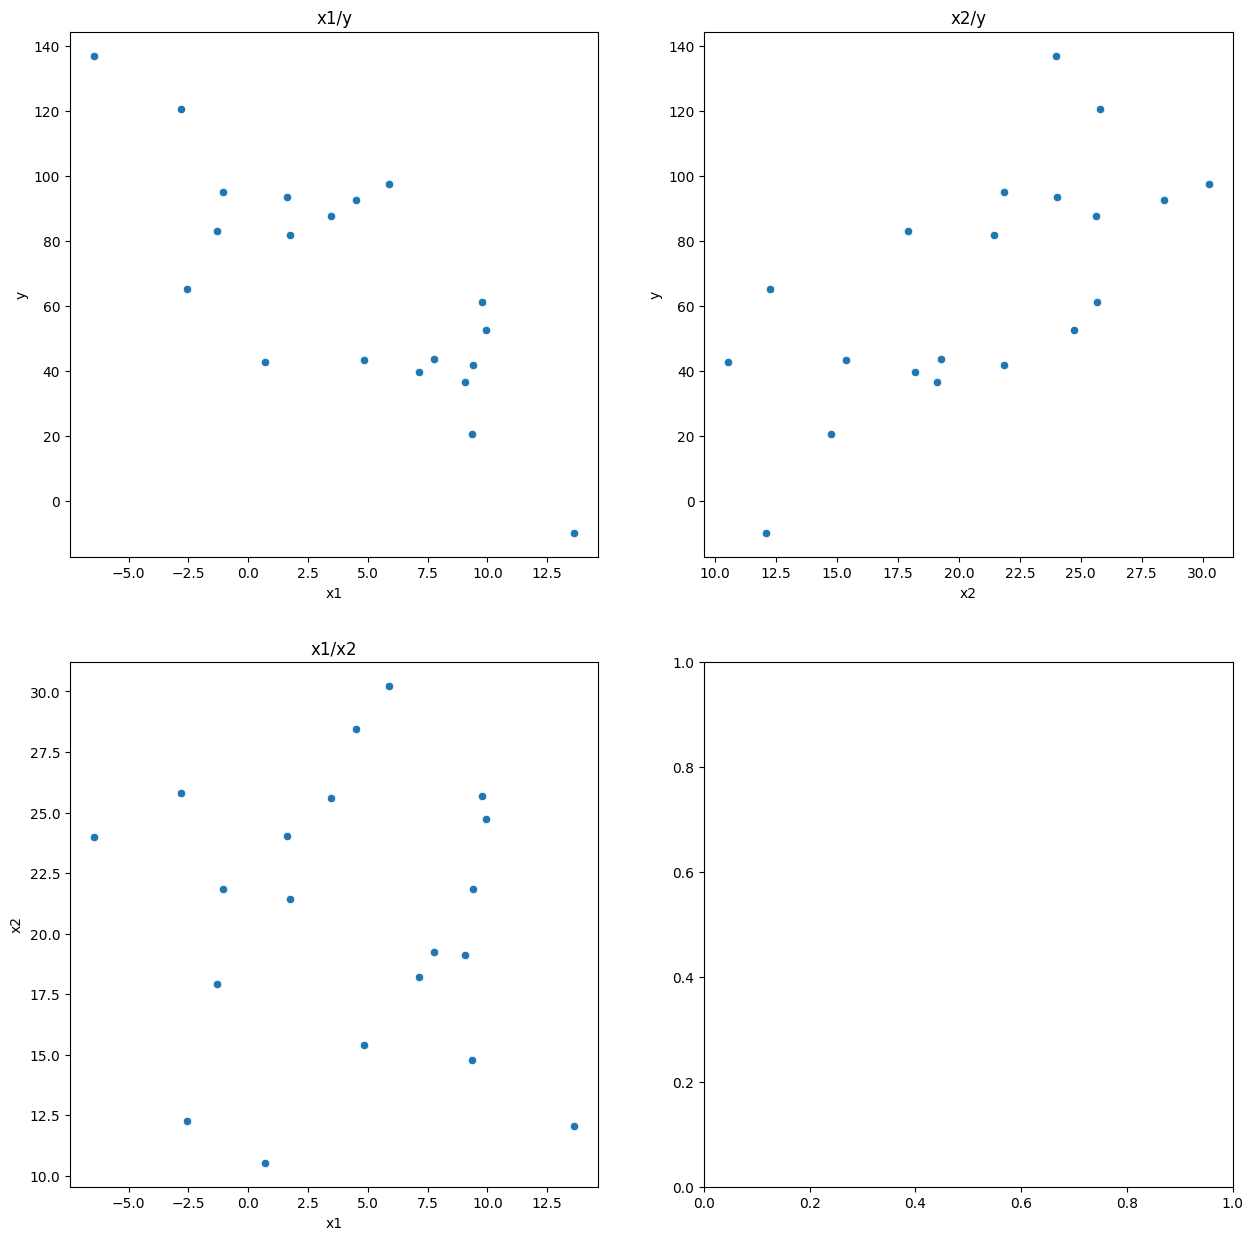

In [242]:
# КРИТЕРИЙ 11
# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
x1_y = sns.scatterplot(x=df4['x1'], y=df4['y'], ax=axes[0][0])
x1_y.set_title('x1/y')
x2_y = sns.scatterplot(x=df4['x2'], y=df4['y'], ax=axes[0][1])
x2_y.set_title('x2/y')
x1_x2 = sns.scatterplot(x=df4['x1'], y=df4['x2'], ax=axes[1][0])
x1_x2.set_title('x1/x2')
# вывод о корректности использования модели множественной регрессии
print('ввиду того, что у нас есть несколько факторов (x1 и x2), и в дальнейшем мы увидем, что они не связаны лиено друг с другом, то мы используем модель множественной регрессии')
# расчет коэффициентов корреляции
print('Коэффициент корреляции между x1 и x2 = ', df4['x1'].corr(df4['x2']))
print('Коэффициент корреляции между x1 и y = ', df4['x1'].corr(df4['y']))
print('Коэффициент корреляции между x2 и y = ', df4['x2'].corr(df4['y']))
# вывод о необходимости устранения какого-либо фактора
print('Т.к. отсутствует корреляция между x1 и x2, то нет необходимости устранять какой-либо фактор')

In [243]:
# КРИТЕРИЙ 12
X = df4[['x1', 'x2']]
y = df4['y']

# расчет стандартных коэффицентов регрессии
X_standardized = (X - X.mean()) / X.std()  # Стандартизация независимых переменных
y_standardized = (y - y.mean()) / y.std()  # Стандартизация зависимой переменной

# Модель со стандартизированными переменными
model_standardized = sm.OLS(y_standardized, X_standardized).fit()
standardized_coefficients = model_standardized.params
print("Стандартные коэффициенты регрессии:")
print(standardized_coefficients)

Стандартные коэффициенты регрессии:
x1   -0.741735
x2    0.614194
dtype: float64



Коэффициенты чистой регрессии:
const     -4.274359e-15
x1_pure    3.400058e-15
x2_pure   -9.853229e-16
dtype: float64


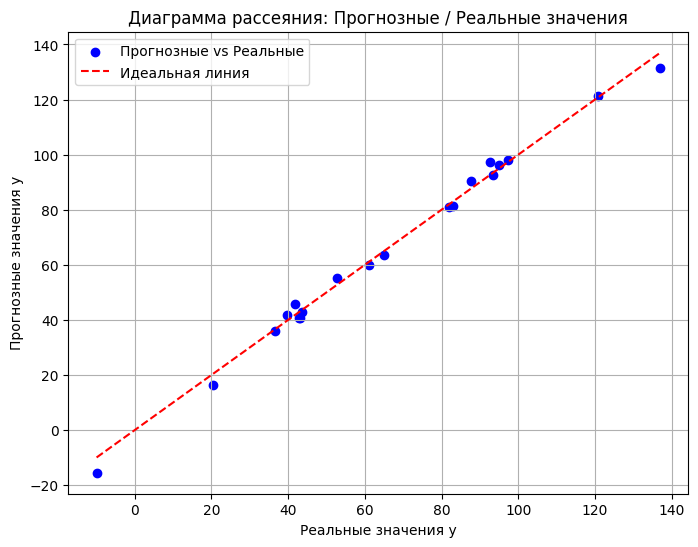

In [244]:
# КРИТЕРИЙ 13
x1_pure = sm.OLS(df4['x1'], sm.add_constant(df4['x2'])).fit().resid  # Остатки x1
x2_pure = sm.OLS(df4['x2'], sm.add_constant(df4['x1'])).fit().resid  # Остатки x2
y_pure = sm.OLS(df4['y'], sm.add_constant(df4[['x1', 'x2']])).fit().resid  # Остатки y

# Регрессия остатков (чистая регрессия)
pure_model = sm.OLS(y_pure, sm.add_constant(pd.DataFrame({'x1_pure': x1_pure, 'x2_pure': x2_pure}))).fit()
print("\nКоэффициенты чистой регрессии:")
print(pure_model.params)
# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Прогнозные vs Реальные')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальная линия')
plt.xlabel('Реальные значения y')
plt.ylabel('Прогнозные значения y')
plt.title('Диаграмма рассеяния: Прогнозные / Реальные значения')
plt.legend()
plt.grid()
plt.show()

In [245]:
# КРИТЕРИЙ 14

# Коэффициент детерминации (R^2)
r_squared = model.rsquared

# Индекс множественной корреляции (R)
multiple_correlation_index = r_squared ** 0.5

print("Коэффициент детерминации:", r_squared)
print("Индекс множественной корреляции:", multiple_correlation_index)
# расчет F-критерия
f_statistic = model.fvalue
print(f"F-критерий: {f_statistic:.3f}")
# вывод о статистической значимости уравнения в целом

print('Можно сделать вывод,что уравнение регрессии статистически значимо')

Коэффициент детерминации: 0.9985971057348919
Индекс множественной корреляции: 0.9992983066806888
F-критерий: 6406.309
Можно сделать вывод,что уравнение регрессии статистически значимо


In [246]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике
import plotly.express as px

x1 = df4['x1']
x2 = df4['x2']
y = df4['y']
df_with_pred = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_pred, 'type':'предсказание'})

df4['type'] = 'реальное значение'

df_with_pred = pd.concat([df4, df_with_pred], axis=0)

fig = px.scatter_3d(df_with_pred, x='x1', y='x2', z='y', color='type')
fig.show()
